In [67]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

In [68]:
G=nx.DiGraph()

In [69]:
G.add_edges_from([(0,1),(1,2),(1,3),(2,1),(3,0),(3,2)])

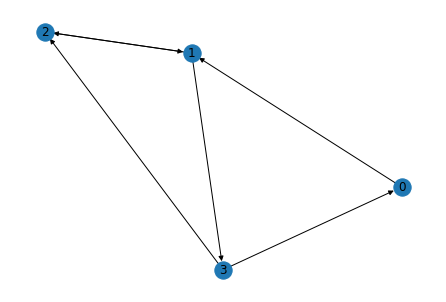

In [70]:
nx.draw(G,with_labels=True)

In [71]:
attrs = {0: {'attr1': 0, 'attr2': 0}, 1: {'attr1': 1, 'attr2': -1}, 2: {'attr1': 2, 'attr2': -2}, 3: {'attr1': 3, 'attr2': -3}}

In [72]:
nx.set_node_attributes(G, attrs)

In [75]:
G.nodes[0]['attr1']

0

In [136]:
order = sorted(list(G.nodes()))

In [137]:
order

[0, 1, 2, 3]

In [139]:
from networkx import karate_club_graph, to_numpy_matrix

In [141]:
A = to_numpy_matrix(G,nodelist=order )
A

matrix([[0., 1., 0., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 0.],
        [1., 0., 1., 0.]])

In [142]:
print(A)

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]


In [143]:
A.shape

(4, 4)

In [144]:
X = np.matrix([[DG.nodes[i]['attr1'], DG.nodes[i]['attr2']]
            for i in range(A.shape[0])
        ], dtype=float)

In [145]:
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [146]:
print(A)
print(X)

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]
[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


In [147]:
A*X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

In [148]:
#Adding Self-Loops
I = np.matrix(np.eye(A.shape[0]))
A_hat=A+I

In [149]:
A_hat

matrix([[1., 1., 0., 0.],
        [0., 1., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 1., 1.]])

In [150]:
A_hat*X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

In [151]:
#indegree
D_hat=np.array(np.sum(A_hat, axis=0))[0]

In [152]:
D_hat

array([2., 3., 3., 2.])

In [153]:
D_hat=np.matrix(np.diag(D_hat))

In [154]:
D_hat

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 2.]])

In [155]:
D_hat**-1 * A_hat * X

matrix([[ 0.5, -0.5],
        [ 2. , -2. ],
        [ 1. , -1. ],
        [ 2.5, -2.5]])

In [156]:
W = np.matrix([
             [1, -1],
             [-1, 1]
         ])

In [157]:
W

matrix([[ 1, -1],
        [-1,  1]])

In [158]:
print(W)

[[ 1 -1]
 [-1  1]]


In [159]:
D_hat**-1 * A_hat * X * W

matrix([[ 1., -1.],
        [ 4., -4.],
        [ 2., -2.],
        [ 5., -5.]])

In [160]:
relu(D_hat**-1 * A_hat * X * W)

NameError: name 'relu' is not defined